In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import itertools

BASE_PATH = "/Users/shai/personal/deepvoice/amber/"

## Load Data

In [2]:
def load_data(base_path, files):
    new_batch = pd.DataFrame()
    for f in files:
        file = os.path.join(base_path, f)
        tmp_file = pd.read_csv(file, sep="\t", on_bad_lines='skip')
        tmp_file['annotation_source'] = f.replace('.txt', '')
        new_batch = pd.concat([new_batch, tmp_file], axis=0)
    return new_batch


def add_length_and_relative_times(df):
    df['length'] = df['End Time (s)'] - df['Begin Time (s)']
    # relative-per-wav-file begin time
    df['Begin Time (s)'] = df['File Offset (s)']
    df['End Time (s)'] = df['Begin Time (s)'] + df['length']
    return df

def rename_filter_columns(df):
    most_important_fields = {'Begin Time (s)': 'begin_time',
                         'End Time (s)': 'end_time',
                         'End File': 'filename',
                         'length': 'call_length',
                         'Low Freq (Hz)': 'low_freq',
                         'High Freq (Hz)': 'high_freq',
                         'Peak Freq (Hz)': 'peak_freq',
                         'Class': 'class',
                         'Type': 'type',
                         'annotation_source': 'annotation_source',
                        }
    df = df[most_important_fields.keys()]
    return df.rename(columns=most_important_fields)

In [3]:
batch_0 = "DeepVoice_MMF"
files_0 = ['PPB_2019_Aug_27_2_of_2.txt', 'PPB_2020_Jan_25.txt', 'PPB_2019_Nov_20.txt', 'PPB_2019_Aug_04.txt', 'PPB_2018_Oct_25.txt', 'PPB_2020_Jan_27_2_of_2.txt', 'PPB_2019_Oct_21.txt', 'PPB_2020_Jan_27_1_of_2.txt', 'PPB_2019_Aug_27_1_of_2.txt']
batch0 = load_data(base_path=os.path.join(BASE_PATH, batch_0), files=files_0)
# batch0.count()

In [4]:
batch_1 = 'PAM training/Raven .txt'
files_1 = ['6423.211017010010_BP_echo_whis.txt', '6426.211014064032_echo_whis.txt', '6423.211026192010_whis_echo.txt',
          '6426.211014184032_whis_buzz_BP.txt', '6423.211101052010_BP_echo_whis.txt']
batch1 = load_data(base_path=os.path.join(BASE_PATH, batch_1), files=files_1)
# batch1.count()

In [5]:
batch_2 = '2024-05-22 12.12.27 - Additional training data Amber Crittenden/'
files_2 = ['PPB_2017_Mar_09_1_ZOOM0042-48.txt', 'PPB_2017_Mar_09_2_ZOOM49-57.txt']
batch2 = load_data(base_path=os.path.join(BASE_PATH, batch_2), files=files_2)

In [6]:
all_data = pd.concat([batch0, batch1, batch2], axis=0)

### clean and rearrange

In [7]:
df = add_length_and_relative_times(all_data)
df = rename_filter_columns(df)

In [11]:
df[df['filename'].str.contains('224')]

,begin_time,end_time,filename,call_length,low_freq,high_freq,peak_freq,class,type,annotation_source
24,58.5898,59.769080,PPB04082019_ZOOM0224.WAV,1.179280,0.000,48000.000,0.0,Pz,P,PPB_2019_Aug_04
25,60.5263,61.012146,PPB04082019_ZOOM0224.WAV,0.485846,0.000,48000.000,0.0,Pz,P,PPB_2019_Aug_04
26,72.7017,74.017900,PPB04082019_ZOOM0224.WAV,1.316200,11423.341,15048.055,12562.5,BS,BW,PPB_2019_Aug_04
27,74.0707,74.830386,PPB04082019_ZOOM0224.WAV,0.759686,0.000,48000.000,0.0,Pz,P,PPB_2019_Aug_04
28,75.5546,75.824023,PPB04082019_ZOOM0224.WAV,0.269423,12411.899,15597.254,12750.0,BUp,BW,PPB_2019_Aug_04
29,76.0504,76.589525,PPB04082019_ZOOM0224.WAV,0.539125,9408.242,22865.600,10687.5,Pz,P,PPB_2019_Aug_04
30,79.9066,80.772288,PPB04082019_ZOOM0224.WAV,0.865688,0.000,21748.284,0.0,Pz,P,PPB_2019_Aug_04
31,82.4592,82.836834,PPB04082019_ZOOM0224.WAV,0.377634,0.000,18013.730,0.0,Pz,P,PPB_2019_Aug_04
32,84.3228,84.804984,PPB04082019_ZOOM0224.WAV,0.482184,12961.098,14171.909,14062.5,WCs,BW,PPB_2019_Aug_04


In [8]:
df.head()

,begin_time,end_time,filename,call_length,low_freq,high_freq,peak_freq,class,type,annotation_source
0,31.1246,32.013413,PPB27082019_ZOOM0230.WAV,0.888813,2802.920,12963.504,7875.0,BS,BW,PPB_2019_Aug_27_2_of_2
1,33.0307,34.995178,PPB27082019_ZOOM0230.WAV,1.964478,0.000,1284.672,375.0,NaN,BARKS,PPB_2019_Aug_27_2_of_2
2,33.2908,33.337590,PPB27082019_ZOOM0230.WAV,0.046790,259.754,2568.674,375.0,Pa,P,PPB_2019_Aug_27_2_of_2
3,33.5510,33.589801,PPB27082019_ZOOM0230.WAV,0.038801,288.615,3001.596,375.0,Pa,P,PPB_2019_Aug_27_2_of_2
4,33.8067,33.839795,PPB27082019_ZOOM0230.WAV,0.033095,230.892,2886.150,375.0,Pa,P,PPB_2019_Aug_27_2_of_2


In [9]:
df['type'].value_counts()

P              1219
W               652
BW              285
whis            267
E               251
echo             51
BARKS            46
BP               17
barks            15
buzz              7
BBP               2
unknown           2
DEEP BARKS?       1
whi               1
\W                1
bray?             1
PP                1
penguin?          1
Name: type, dtype: int64

In [10]:
df['class'].value_counts()

Pa     563
Pz     360
WUp    246
Pm     206
BUp    122
WCx    105
Up      94
Pf      74
BS      59
Sn      47
WDn     42
WSn     37
BCx     35
Cx      34
WCs     27
WCa     26
Ca      14
BC      14
BDn     11
BCa     10
Dn       7
Ps       4
Cs       3
Pc       3
pa       3
P        3
BBa      3
Px       2
Wup      2
WuP      1
BFb      1
BPz      1
PA       1
Name: class, dtype: int64

In [11]:
type_mapper_merger = {
    'barks': 'barks',
    'DEEP BARKS?': 'barks',
    'BARKS': 'barks',
    'BW': 'whistle',
    'W': 'whistle',
    '\W': 'whistle',
    'whi': 'whistle',
    'whis': 'whistle',
    'w': 'whistle',
    'BP': 'buzz',
    'BBP': 'buzz',
    'P': 'buzz',
    'PP': 'buzz',
    'E': 'echo',
}

class_mapper_merger = {
    'BC': 'whistle',
    'WC': 'whistle',
    'BUp': 'whistle',
    'WUp': 'whistle',
    'BDn': 'whistle',
    'WDn': 'whistle',
    'BCx': 'whistle',
    'WCx': 'whistle',
    'BCa': 'whistle',
    'WCa': 'whistle',
    'BS': 'whistle',
    'WSn': 'whistle',
    'Bba': 'barks',
    'Pa': 'barks',
    'pa': 'barks',
    'PA': 'barks',
    'Pm': 'barks',
    'BFb': 'buzz',
    'Pf': 'buzz',
    'Pz': 'buzz',
}

# df['type'] = df['type'].replace(type_mapper_merger)
# df['type'].value_counts()

# buzz        1246
# whistle     1206
# echo         302
# barks         62
# unknown        2
# bray?          1
# penguin?       1
# Name: type, dtype: int64

####################################################################################

In [14]:
SUPPORTED_TYPES = ['barks', 'whistle', 'buzz', 'echo']

def mapper_consider_class_and_type(s):

    # types mapper has a value for the given type?
    try:
        type_base_on_type = type_mapper_merger[s['Type']]
    except:
        return s['Type']
        
    # class-based mapper has a value for the given class?
    try:
        type_base_on_class = class_mapper_merger[s['Class']]
    except:
        return type_base_on_type
    
    
    # if mappers are not aligned, there is a case where we anticipate that (with barks)
    if type_base_on_class != type_base_on_type:
        if (s['Type'] == "P" or s['Type'] == "PP"):
            if type_base_on_class == "barks":
                return type_base_on_class
        else:
            print("type_base_on_type:", type_base_on_type, "type_base_on_class: ", type_base_on_class)
#             print(s)
            return type_base_on_type
    return type_base_on_class



def not_noise(s, supported_vals: list):
    """
    when a value of annotation hasn't been identified as any of the supported values, we shall set it as "unknown" unless there are indications that say differently
    """
    curr_type = mapper_consider_class_and_type(s)
    
    if str(curr_type) not in supported_vals:
        if any(s[['Type', 'Class', 'Overtones', 'Steps', 'Notes']].isin(["BARKS"])):
            return "barks"
        else:
            return "unknown"
    return curr_type



# NOTE: here we use the full information from all_data to decide whether NAN values are barks or not
df['type'] = all_data.apply(not_noise, args=(SUPPORTED_TYPES,), axis=1)

type_base_on_type: whistle type_base_on_class:  barks
type_base_on_type: whistle type_base_on_class:  buzz


In [15]:
df['type'].value_counts()

whistle    1206
barks       846
buzz        475
echo        302
unknown      22
Name: type, dtype: int64

### Exploration

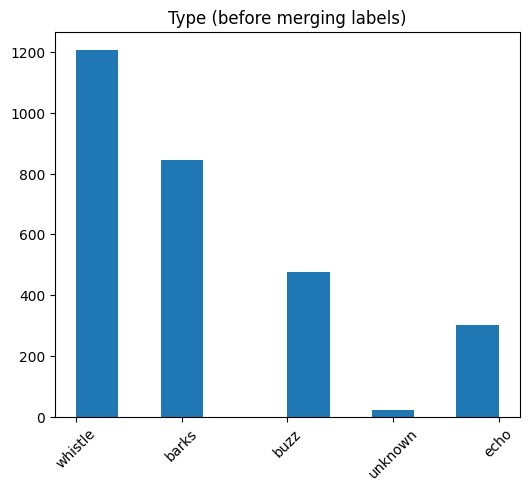

In [16]:
# histogram of types
plt.figure(figsize=(6,5))
plt.title('Type (before merging labels)')
plt.hist(df['type'], bins=10)
plt.xticks(rotation=45)
plt.show()

In [17]:
print(f"\nMean length per type:\n{df[['type','call_length']].groupby('type').mean()}")
print(f"\nMax length per type:\n{df[['type','call_length']].groupby('type').max()}")


Mean length per type:
         call_length
type                
barks       1.071376
buzz        0.508908
echo        2.764338
unknown     1.239336
whistle     0.370822

Max length per type:
         call_length
type                
barks      78.491094
buzz       12.165749
echo       32.013884
unknown    12.339882
whistle     2.425123


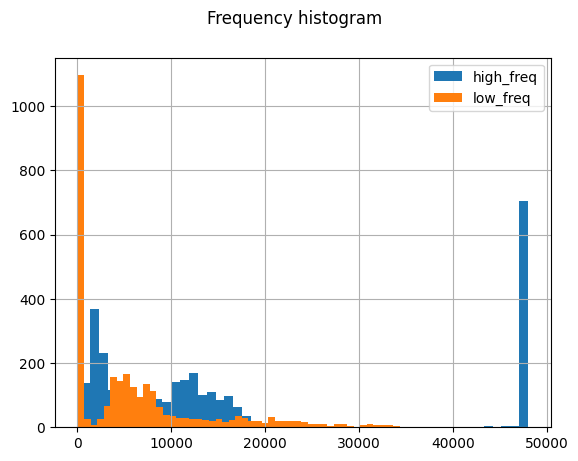

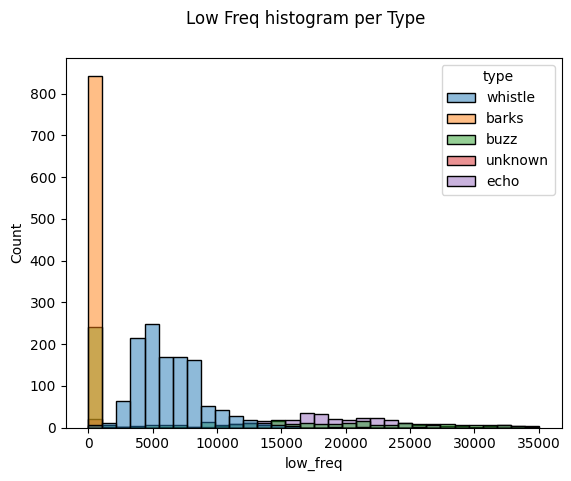

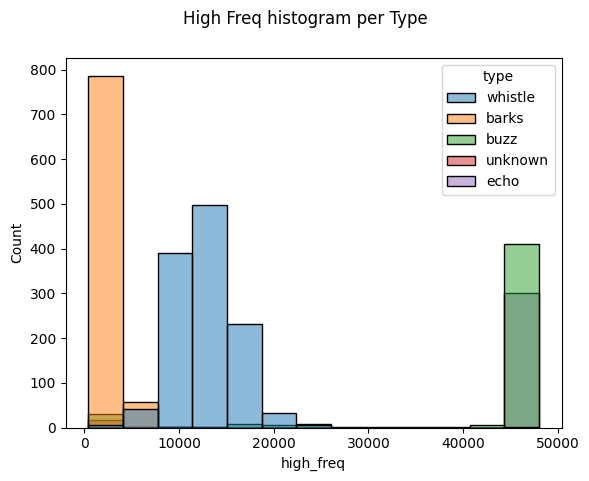

In [18]:
# frequencies
df["high_freq"].hist(bins=50, legend=True)
df["low_freq"].hist(bins=50, legend=True)
plt.suptitle('Frequency histogram')
plt.show()

sns.histplot(df[['low_freq', 'type', 'high_freq']].reset_index(drop=True), x='low_freq', hue='type')
plt.suptitle('Low Freq histogram per Type')
plt.show()

sns.histplot(df[['low_freq', 'type', 'high_freq']].reset_index(drop=True), x='high_freq', hue='type')
plt.suptitle('High Freq histogram per Type')
plt.show()

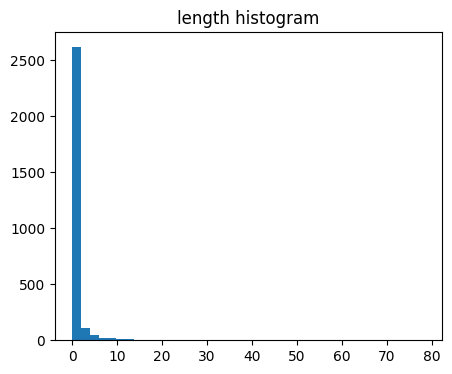

153 too big samples - need to verify what's in there:
types:
echo       82
barks      59
buzz       11
unknown     1
Name: type, dtype: int64
too_big_samples per group - mean length type
barks      13.525224
buzz        7.408958
echo        6.270611
unknown    12.339882
Name: call_length, dtype: float64


711 too short samples
types:
barks      548
whistle    106
buzz        52
unknown      5
Name: type, dtype: int64
type
barks      0.052427
buzz       0.082774
unknown    0.079389
whistle    0.069057
Name: call_length, dtype: float64


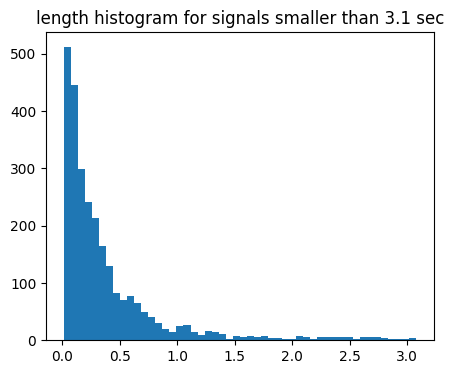

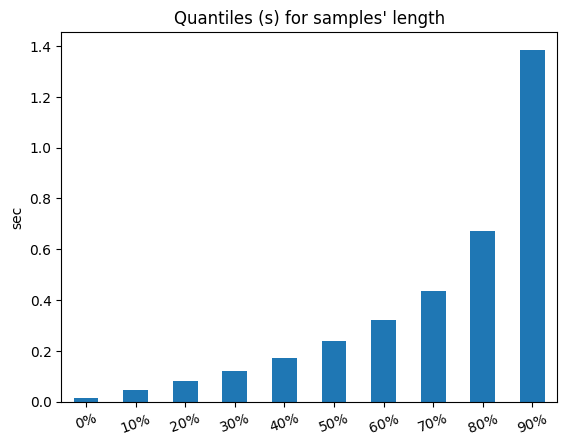

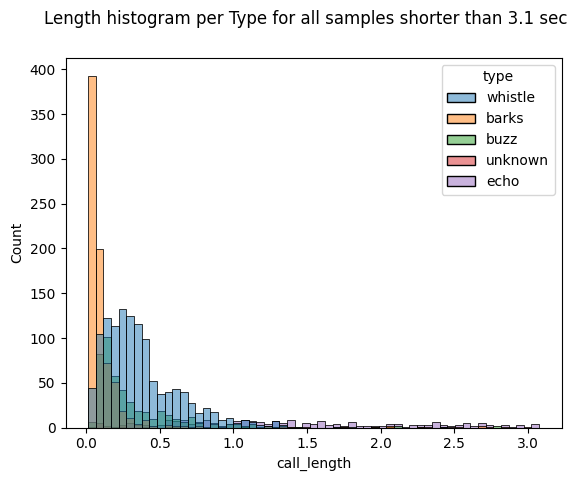

In [19]:
# lengths
plt.figure(figsize=(5,4))
plt.title('length histogram')
plt.hist(df['call_length'], bins=40)
plt.show()

TH_max_seq_len, TH_min_seq_len = 3.1, 0.1
too_big_samples = df[df["call_length"] > TH_max_seq_len]
too_short_samples = df[df["call_length"] < TH_min_seq_len]
print(f'{len(too_big_samples)} too big samples - need to verify what\'s in there:\n'
      # f'indices: {too_big_samples.index}\n'
      f'types:\n{too_big_samples["type"].value_counts()}')
print(f'too_big_samples per group - mean length {too_big_samples.groupby("type")["call_length"].mean()}')

print(f'\n\n{len(too_short_samples)} too short samples')
print(f'types:\n{too_short_samples["type"].value_counts()}')
print(too_short_samples.groupby("type")['call_length'].mean())


plt.figure(figsize=(5,4))
plt.title(f'length histogram for signals smaller than {TH_max_seq_len} sec')
plt.hist(df['call_length'][df['call_length'] < TH_max_seq_len], bins=50)
plt.show()


quantile_keys = np.arange(0, 1, 0.1)
pd.Series(np.quantile(df['call_length'], quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles').plot.bar()
plt.title('Quantiles (s) for samples\' length')
plt.xticks(rotation=20)
plt.ylabel('sec')
plt.show()

sns.histplot(df[['call_length', 'type']][df['call_length'] < TH_max_seq_len].reset_index(drop=True), x='call_length', hue='type')
plt.suptitle(f'Length histogram per Type for all samples shorter than {TH_max_seq_len} sec')
plt.show()

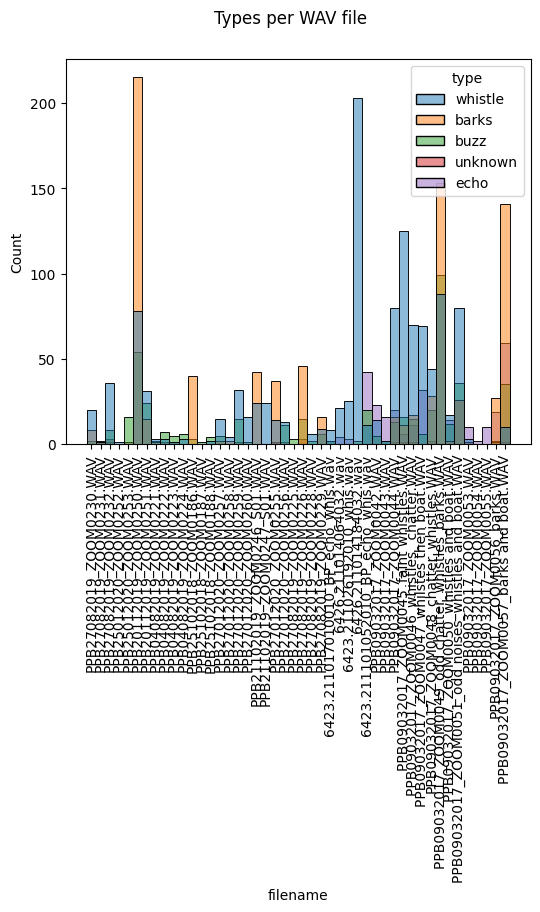

number of wav files available: 46


In [20]:
## find the most interesting WAV to take a careful look at
plt.figure(figsize=(6,5))
sns.histplot(df[['filename', 'type', 'call_length']].reset_index(drop=True), x='filename', hue='type')
plt.suptitle('Types per WAV file')
plt.xticks(rotation=90)
plt.show()

print(f"number of wav files available: {len(df['filename'].unique())}")

In [21]:
f"the signal with the highest initial freq starts at: {df['low_freq'].max()} Hz"

'the signal with the highest initial freq starts at: 35020.408 Hz'

In [22]:
### break too long signals
##############################
def break_too_long_calls(df_filtered, max_length=3):
    df_filtered_2 = pd.DataFrame()
    # after breaking what was unrelated, we should now break if it's too long         
    for index, row in df_filtered.iterrows():    
        # if the sequence is too long, we should break it into segments
        if row['call_length'] > max_length:
            while row['call_length'] > max_length:
                row_to_append = row.copy()
                row_to_append['call_length']=max_length
                row_to_append['end_time'] = row_to_append['begin_time'] +max_length
                df_filtered_2 = pd.concat([df_filtered_2, row_to_append.to_frame().transpose()])
                # update row
                row['begin_time'] += max_length
                row['call_length'] = row['end_time']-row['begin_time']
            # remainder
            df_filtered_2 = pd.concat([df_filtered_2, row.to_frame().transpose()])
        else:
            df_filtered_2 = pd.concat([df_filtered_2, row.to_frame().transpose()])
    return df_filtered_2

df_2 = break_too_long_calls(df)

before we had (2851, 10) objects and now we have (3259, 10)


<AxesSubplot:>

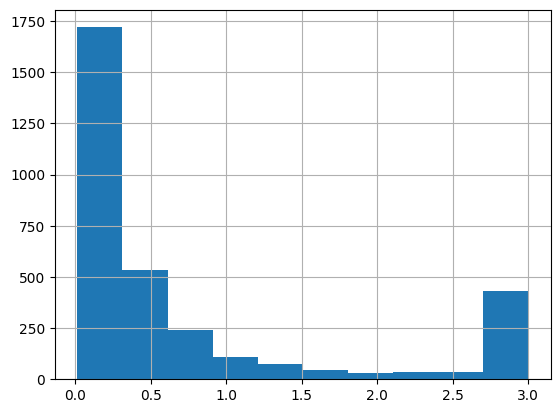

In [23]:
print(f"before we had {df.shape} objects and now we have {df_2.shape}")
df_2['call_length'].hist()

### verification

In [24]:
def standartize_names(s):
    if s.startswith('6'):
        return '.'.join(s.split('.')[0:-1]).split('_')[0] + '.wav'
    elif s.startswith('PPB'):
        return '_'.join(s.split('.')[0].split('_')[0:2]) + '.WAV'
    return s
df_2['filename'] = df_2['filename'].apply(standartize_names)

In [25]:
wav_folder = os.path.join(BASE_PATH, "wavs")

### verification
train_files_list = set(df_2['filename'].unique())
problematic_files = []
# wavs lengths
wavs_length_dict = {}
for a in train_files_list:
    path_to_wav = f'{wav_folder}/{a}'
    wavs_length_dict[a]=sf.info(path_to_wav).frames/sf.info(path_to_wav).samplerate

# maximal end_time per file in the trainset
end_time_max_details = (df_2.groupby('filename')['end_time'].max().reset_index()[['filename', 'end_time']])
end_time_dict = dict(zip(end_time_max_details['filename'],end_time_max_details['end_time']))

# print details about problematic files
for a in train_files_list:
    if wavs_length_dict[a] < end_time_dict[a]:
        problematic_files.append(a)
        print(f'file:{a}, file length: {wavs_length_dict[a]}, last end time: {end_time_dict[a]}')

### BG as noise

In [26]:
def multirange_diff(r1_list, r2_list):
    """Generated the difference between two time ranges"""
    for r2 in r2_list:
        r1_list = list(itertools.chain(*[range_diff(r1, r2) for r1 in r1_list]))
    return r1_list

def range_diff(r1, r2):
    s1, e1 = r1
    s2, e2 = r2
    endpoints = sorted((s1, s2, e1, e2))
    result = []
    if endpoints[0] == s1 and endpoints[1] != s1:
        result.append((endpoints[0], endpoints[1]))
    if endpoints[3] == e1 and endpoints[2] != e1:
        result.append((endpoints[2], endpoints[3]))
    return result

In [27]:
df_training = df_2.copy()
df_training = df_training.rename(columns={"type": "label"})
## add noise in between calls
for file in df_training['filename'].unique():
    file_length = sf.info(os.path.join(BASE_PATH, wav_folder, file)).duration
    print(f"file {os.path.basename(file)}, length: {file_length}")
    relevant_annot = df_training[df_training['filename'] == file]
    
    # Background is the subtraction of the annotated sections from the whole timerange in the file 
    bg_ranges = np.array(multirange_diff([(0, file_length)], [(relevant_annot['begin_time'].iloc[i], relevant_annot['end_time'].iloc[i]) for i in range(len(relevant_annot))])).astype(float)
    if len(bg_ranges)>1:
        # Noise exists in all channels, signal exists only in the channel it was annotated in
        bg_annot = pd.DataFrame({'begin_time': bg_ranges[:, 0], 'end_time': bg_ranges[:, 1], 'call_length': bg_ranges[:, 1]-bg_ranges[:, 0], 'label': ['Noise']*len(bg_ranges), 'filename':[file] * len(bg_ranges)})

        df_training = pd.concat([df_training, bg_annot], axis=0, ignore_index=True)

file PPB27082019_ZOOM0230.WAV, length: 241.70666666666668
file PPB27082019_ZOOM0231.WAV, length: 271.964
file PPB27082019_ZOOM0232.WAV, length: 276.888
file PPB25012020_ZOOM0252.WAV, length: 95.176
file PPB25012020_ZOOM0253.WAV, length: 277.82933333333335
file PPB20112019_ZOOM0250.WAV, length: 713.484
file PPB20112019_ZOOM0251.WAV, length: 279.132
file PPB04082019_ZOOM0221.WAV, length: 158.376
file PPB04082019_ZOOM0222.WAV, length: 256.28
file PPB04082019_ZOOM0223.WAV, length: 177.428
file PPB04082019_ZOOM0224.WAV, length: 99.336
file PPB25102018_ZOOM0186.WAV, length: 268.716
file PPB25102018_ZOOM0187.WAV, length: 121.328
file PPB25102018_ZOOM0188.WAV, length: 301.088
file PPB27012020_ZOOM0257.WAV, length: 189.47866666666667
file PPB27012020_ZOOM0258.WAV, length: 317.27066666666667
file PPB27012020_ZOOM0259.WAV, length: 370.90933333333334
file PPB27012020_ZOOM0260.WAV, length: 299.65866666666665
file PPB21102019_ZOOM0246.WAV, length: 269.87733333333335
file PPB21102019_ZOOM0247.WAV, le

In [28]:
df_training['filename'] = df_training['filename'].str.replace('.WAV','').str.replace('.wav', '')

/Users/shai/personal/deepvoice/soundbay/.env_dv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### names to numbers

In [29]:
df_training['label'].value_counts()

Noise      1647
whistle    1206
barks      1087
buzz        496
echo        444
unknown      26
Name: label, dtype: int64

In [30]:
'''
mapper = {'Noise': 0, 'whistle': 1, "buzz": 2, "barks": 3, "echo": 4, "unknown": -1}
'''
df_training['label'] = df_training['label'].apply(lambda x: 0 if x=="Noise" else 1 if x=="whistle" else 2 if x=="buzz" else 3 if x=='barks' else 4 if x=="echo" else -1)
df_training['label'].value_counts()

 0    1647
 1    1206
 3    1087
 2     496
 4     444
-1      26
Name: label, dtype: int64

In [31]:
## filter calls if they're overlapped with the desired class
def time_intersects(x, y):
    return min(y['end_time'], x['end_time']) - max(y['begin_time'], x['begin_time']) > 0


def clear_overlapped_noise(df):
    rows_to_drop = []
    dfg = df.groupby('filename')
    for name, g in dfg:
        g = g.sort_values('end_time')
        # lines of the same group
        for idx, row in g.iterrows():
            if row['label'] == 0:
                for jdx, other in g.iterrows():
                    minn = min(row['begin_time'], other['begin_time'])
                    maxx = max(row['end_time'], other['end_time'])

                    if other['begin_time'] < minn:
                        continue
                    elif other['end_time'] > maxx:
                        break
                        
                    if other['label'] == 1 and time_intersects(row, other):
                        rows_to_drop.append(idx)
                        break

    # Drop the rows
    df_cleaned = df.drop(rows_to_drop)
    return df_cleaned

In [32]:
## one class Vs all

# Whistle VS ALL
df_training_whisles = df_training.copy()[df_training['label'] > -1]
df_training_whisles['label'] = df_training_whisles['label'].apply(lambda x: 1 if x==1 else 0)
df_training_whisles = clear_overlapped_noise(df_training_whisles)

# Buzz VS ALL
df_training_buzz = df_training.copy()[df_training['label'] > -1]
df_training_buzz['label'] = df_training_buzz['label'].apply(lambda x: 1 if x==2 else 0)
df_training_buzz = clear_overlapped_noise(df_training_buzz)


# Barks VS ALL
df_training_barks = df_training.copy()[df_training['label'] > -1]
df_training_barks['label'] = df_training_barks['label'].apply(lambda x: 1 if x==3 else 0)
df_training_barks = clear_overlapped_noise(df_training_barks)


# Echo VS ALL
df_training_echo = df_training.copy()[df_training['label'] > -1]
df_training_echo['label'] = df_training_echo['label'].apply(lambda x: 1 if x==4 else 0)
df_training_echo = clear_overlapped_noise(df_training_echo)


# ## All calls Vs
# df_training_calls_vs_all = df_training.copy()
# df_training_calls_vs_all['label'] = df_training_calls_vs_all['label'].apply(lambda x: 1 if x!=0 else 0)

In [33]:
train = ['PPB27082019_ZOOM0230', 'PPB27082019_ZOOM0231', 'PPB27082019_ZOOM0232',
 'PPB25012020_ZOOM0252', 'PPB20112019_ZOOM0250', 'PPB20112019_ZOOM0251',
 'PPB04082019_ZOOM0221', 'PPB04082019_ZOOM0222', 'PPB04082019_ZOOM0223',
 'PPB25102018_ZOOM0186', 'PPB25102018_ZOOM0187', 'PPB25102018_ZOOM0188',
 'PPB27012020_ZOOM0257', 'PPB27012020_ZOOM0259', 'PPB27012020_ZOOM0260',
 'PPB21102019_ZOOM0246', 'PPB21102019_ZOOM0247', 'PPB27012020_ZOOM0256',
 'PPB27082019_ZOOM0225', 'PPB27082019_ZOOM0226', 'PPB27082019_ZOOM0228',
 'PPB27082019_ZOOM0229', '6423.211026192010', '6426.211014184032', '6423.211101052010',
 'PPB09032017_ZOOM0042', 'PPB09032017_ZOOM0043', 'PPB09032017_ZOOM0044',
 'PPB09032017_ZOOM0045', 'PPB09032017_ZOOM0046', 'PPB09032017_ZOOM0048',
 'PPB09032017_ZOOM0049', 'PPB09032017_ZOOM0051', 'PPB09032017_ZOOM0053',
 'PPB09032017_ZOOM0054', 'PPB09032017_ZOOM0055', 'PPB09032017_ZOOM0056',
 'PPB09032017_ZOOM0057']
val= ['PPB25012020_ZOOM0253', 'PPB04082019_ZOOM0224', 'PPB27012020_ZOOM0255', 'PPB09032017_ZOOM0047',
      'PPB09032017_ZOOM0050', '6423.211017010010', 'PPB27012020_ZOOM0258', '6426.211014064032']

In [34]:
def train_val_test_split_disjoint_files(df_training, save, name, test_set=None, val_set=None, train_set=None):
    
    df_valset = df_training[df_training['filename'].isin(val_set)]
    df_testset = df_training[df_training['filename'].isin(test_set)] if test_set else None
    df_trainset = df_training[df_training['filename'].isin(train_set)]
    
    print(name)
    print(f'\ntrain: {len(df_trainset)}, val: {len(df_valset)}')
    print(f"\nfiles:\ntrain: {df_trainset['filename'].unique()}, val: {df_valset['filename'].unique()}")
    print(f"\ntypes:\ntrain: {df_trainset.value_counts('label')}, val: {df_valset.value_counts('label')}")
    
    if save:
        save_train_val_test_dfs(name, df_trainset,df_valset,df_testset)
        print('done saving')
    else:
        return df_trainset,df_valset,df_testset
    
def save_train_val_test_dfs(name, df_trainset, df_valset, df_testset):
    basepath = '/Users/shai/personal/deepvoice/amber/data_training_oct26/'
    os.makedirs(basepath, exist_ok=True)
    df_trainset.to_csv(basepath+f'train_{name}_new.csv', index=False)
    df_valset.to_csv(basepath+f'val_{name}_new.csv', index=False)

In [35]:
train_val_test_split_disjoint_files(df_training, save=True, name='allcls', train_set=train, test_set=[], val_set=val)
train_val_test_split_disjoint_files(df_training_whisles, save=True, name='whis', train_set=train, test_set=[], val_set=val)
train_val_test_split_disjoint_files(df_training_buzz, save=True, name='buzz', train_set=train, test_set=[], val_set=val)
train_val_test_split_disjoint_files(df_training_barks, save=True, name='barks', train_set=train, test_set=[], val_set=val)
train_val_test_split_disjoint_files(df_training_echo, save=True, name='echo', train_set=train, test_set=[], val_set=val)

allcls

train: 4374, val: 532

files:
train: ['PPB27082019_ZOOM0230' 'PPB27082019_ZOOM0231' 'PPB27082019_ZOOM0232'
 'PPB25012020_ZOOM0252' 'PPB20112019_ZOOM0250' 'PPB20112019_ZOOM0251'
 'PPB04082019_ZOOM0221' 'PPB04082019_ZOOM0222' 'PPB04082019_ZOOM0223'
 'PPB25102018_ZOOM0186' 'PPB25102018_ZOOM0187' 'PPB25102018_ZOOM0188'
 'PPB27012020_ZOOM0257' 'PPB27012020_ZOOM0259' 'PPB27012020_ZOOM0260'
 'PPB21102019_ZOOM0246' 'PPB21102019_ZOOM0247' 'PPB27012020_ZOOM0256'
 'PPB27082019_ZOOM0225' 'PPB27082019_ZOOM0226' 'PPB27082019_ZOOM0228'
 'PPB27082019_ZOOM0229' '6423.211026192010' '6426.211014184032'
 '6423.211101052010' 'PPB09032017_ZOOM0042' 'PPB09032017_ZOOM0043'
 'PPB09032017_ZOOM0044' 'PPB09032017_ZOOM0045' 'PPB09032017_ZOOM0046'
 'PPB09032017_ZOOM0048' 'PPB09032017_ZOOM0049' 'PPB09032017_ZOOM0051'
 'PPB09032017_ZOOM0053' 'PPB09032017_ZOOM0054' 'PPB09032017_ZOOM0055'
 'PPB09032017_ZOOM0056' 'PPB09032017_ZOOM0057'], val: ['PPB25012020_ZOOM0253' 'PPB04082019_ZOOM0224' 'PPB27012020_ZOOM0258'
